In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.over_sampling import ADASYN

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
ads = ADASYN(random_state=0)

In [4]:
res.resample_directory(ads, path, 'ADASYN', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/ADASYN/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/ADASYN/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 7666 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=100)

Epoch 1/100
163/163 [==============================] - 11s 67ms/step - loss: 0.3775 - tp: 4221.0000 - fp: 859.0000 - tn: 4343.0000 - fn: 981.0000 - accuracy: 0.8231 - precision: 0.8309 - recall: 0.8114 - auc: 0.9111 - val_loss: 0.5938 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.7910
Epoch 2/100
163/163 [==============================] - 9s 58ms/step - loss: 0.2249 - tp: 4709.0000 - fp: 511.0000 - tn: 4691.0000 - fn: 493.0000 - accuracy: 0.9035 - precision: 0.9021 - recall: 0.9052 - auc: 0.9691 - val_loss: 0.4578 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8633
Epoch 3/100
163/163 [==============================] - 9s 58ms/step - loss: 0.2251 - tp: 4714.0000 - fp: 504.0000 - tn: 4712.0000 - fn: 502.0000 - accuracy: 0.9036 - precision: 0.9034 - recall: 0.9038 - auc: 0.9

Epoch 22/100
163/163 [==============================] - 9s 56ms/step - loss: 0.1346 - tp: 4927.0000 - fp: 281.0000 - tn: 4921.0000 - fn: 275.0000 - accuracy: 0.9466 - precision: 0.9460 - recall: 0.9471 - auc: 0.9887 - val_loss: 0.5802 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8223
Epoch 23/100
163/163 [==============================] - 9s 56ms/step - loss: 0.1262 - tp: 4927.0000 - fp: 282.0000 - tn: 4920.0000 - fn: 275.0000 - accuracy: 0.9465 - precision: 0.9459 - recall: 0.9471 - auc: 0.9902 - val_loss: 0.6099 - val_tp: 190.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 114.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.8125
Epoch 24/100
163/163 [==============================] - 9s 57ms/step - loss: 0.1489 - tp: 4904.0000 - fp: 298.0000 - tn: 4904.0000 - fn: 298.0000 - accuracy: 0.9427 - precision: 0.9427 - recall: 0.9427 - auc:

Epoch 43/100
163/163 [==============================] - 9s 58ms/step - loss: 0.1209 - tp: 4953.0000 - fp: 253.0000 - tn: 4949.0000 - fn: 249.0000 - accuracy: 0.9517 - precision: 0.9514 - recall: 0.9521 - auc: 0.9909 - val_loss: 0.4753 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8652
Epoch 44/100
163/163 [==============================] - 9s 56ms/step - loss: 0.1207 - tp: 4977.0000 - fp: 225.0000 - tn: 4977.0000 - fn: 225.0000 - accuracy: 0.9567 - precision: 0.9567 - recall: 0.9567 - auc: 0.9909 - val_loss: 0.6364 - val_tp: 209.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 95.0000 - val_accuracy: 0.7188 - val_precision: 0.7333 - val_recall: 0.6875 - val_auc: 0.8262
Epoch 45/100
163/163 [==============================] - 9s 57ms/step - loss: 0.1042 - tp: 5000.0000 - fp: 202.0000 - tn: 5000.0000 - fn: 202.0000 - accuracy: 0.9612 - precision: 0.9612 - recall: 0.9612 - auc: 0

Epoch 64/100
163/163 [==============================] - 9s 58ms/step - loss: 0.1137 - tp: 4996.0000 - fp: 220.0000 - tn: 4996.0000 - fn: 220.0000 - accuracy: 0.9578 - precision: 0.9578 - recall: 0.9578 - auc: 0.9919 - val_loss: 0.3751 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8867
Epoch 65/100
163/163 [==============================] - 9s 58ms/step - loss: 0.0995 - tp: 4997.0000 - fp: 188.0000 - tn: 5000.0000 - fn: 191.0000 - accuracy: 0.9635 - precision: 0.9637 - recall: 0.9632 - auc: 0.9935 - val_loss: 0.3757 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.8945
Epoch 66/100
163/163 [==============================] - 10s 58ms/step - loss: 0.1086 - tp: 5003.0000 - fp: 216.0000 - tn: 5000.0000 - fn: 213.0000 - accuracy: 0.9589 - precision: 0.9586 - recall: 0.9592 - auc: 

Epoch 85/100
163/163 [==============================] - 9s 56ms/step - loss: 0.0890 - tp: 5012.0000 - fp: 186.0000 - tn: 5016.0000 - fn: 190.0000 - accuracy: 0.9639 - precision: 0.9642 - recall: 0.9635 - auc: 0.9950 - val_loss: 0.4875 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8711
Epoch 86/100
163/163 [==============================] - 9s 57ms/step - loss: 0.0911 - tp: 5033.0000 - fp: 184.0000 - tn: 5032.0000 - fn: 183.0000 - accuracy: 0.9648 - precision: 0.9647 - recall: 0.9649 - auc: 0.9947 - val_loss: 0.3767 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.9062
Epoch 87/100
163/163 [==============================] - 10s 59ms/step - loss: 0.0820 - tp: 5048.0000 - fp: 158.0000 - tn: 5044.0000 - fn: 154.0000 - accuracy: 0.9700 - precision: 0.9697 - recall: 0.9704 - auc: 

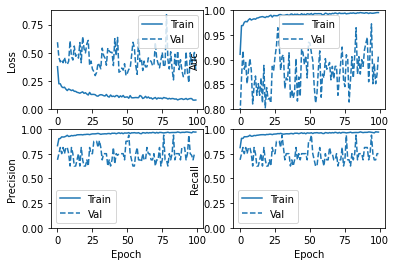

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.97      0.80      0.88       234
   PNEUMONIA       0.89      0.98      0.94       390

    accuracy                           0.92       624
   macro avg       0.93      0.89      0.91       624
weighted avg       0.92      0.92      0.91       624



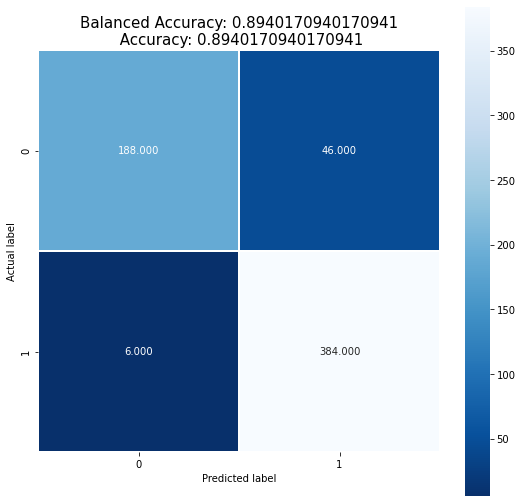

In [13]:
cnn.display_confusion_matrix(test_set)